In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import utils

# Import and Clean the data

In [2]:
# read the data in a pandas dataframe
dataset = pd.read_csv("india.csv")
dataset

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

# Drop unnecessary columns

In [4]:
# drop or delete the unnecessary columns in the data.
dataset = dataset.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
                  'SeaLevelPressureLowInches'], axis = 1)
  

# Replace null values

In [5]:
dataset.isnull()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1315,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1316,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1317,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Explore how many null values are in each column of your dataset
dataset.isnull().sum()

TempHighF                    0
TempAvgF                     0
TempLowF                     0
DewPointHighF                0
DewPointAvgF                 0
DewPointLowF                 0
HumidityHighPercent          0
HumidityAvgPercent           0
HumidityLowPercent           0
SeaLevelPressureAvgInches    0
VisibilityHighMiles          0
VisibilityAvgMiles           0
VisibilityLowMiles           0
WindHighMPH                  0
WindAvgMPH                   0
WindGustMPH                  0
PrecipitationSumInches       0
dtype: int64

In [7]:
  
# the data also contains '-' which indicates no 
# or NIL. This means that data is not available
# we need to replace these values as well.
dataset = dataset.replace('-', 0.0)
  


# Drop the T values of trace rainfall

In [8]:
# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
dataset = dataset.replace('T', 0.0)

# Remove duplicate values

In [9]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1314    False
1315    False
1316    False
1317    False
1318    False
Length: 1319, dtype: bool

# Save clean data

In [10]:
# save the data in a csv file
dataset.to_csv('india_final.csv')

# Import the cleaned data

In [11]:
# read the cleaned data
data = pd.read_csv("india_final.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempHighF                  1319 non-null   int64 
 1   TempAvgF                   1319 non-null   int64 
 2   TempLowF                   1319 non-null   int64 
 3   DewPointHighF              1319 non-null   object
 4   DewPointAvgF               1319 non-null   object
 5   DewPointLowF               1319 non-null   object
 6   HumidityHighPercent        1319 non-null   object
 7   HumidityAvgPercent         1319 non-null   object
 8   HumidityLowPercent         1319 non-null   object
 9   SeaLevelPressureAvgInches  1319 non-null   object
 10  VisibilityHighMiles        1319 non-null   object
 11  VisibilityAvgMiles         1319 non-null   object
 12  VisibilityLowMiles         1319 non-null   object
 13  WindHighMPH                1319 non-null   object
 14  WindAvgM

In [13]:
X = data.drop(['PrecipitationSumInches'], axis=1)

Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

# Data visualization

Mean: 0.11439727065959066


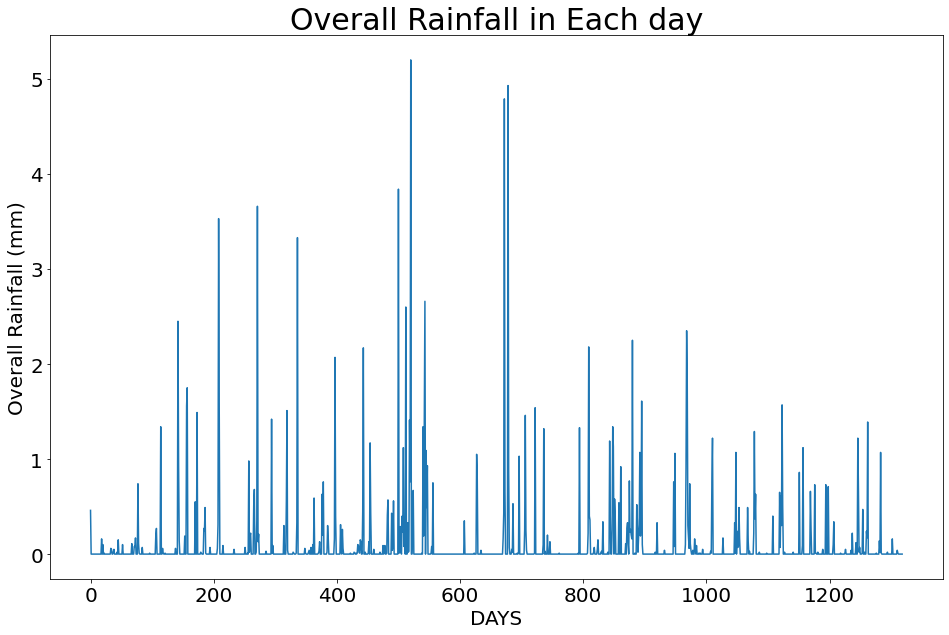

In [14]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = data.groupby('Unnamed: 0').sum()['PrecipitationSumInches']
dfg.plot(kind ='line', title='Overall Rainfall in Each day', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
plt.xlabel('DAYS')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

print('Mean: ' + str(dfg.mean()))


Mean: 80.86277482941622


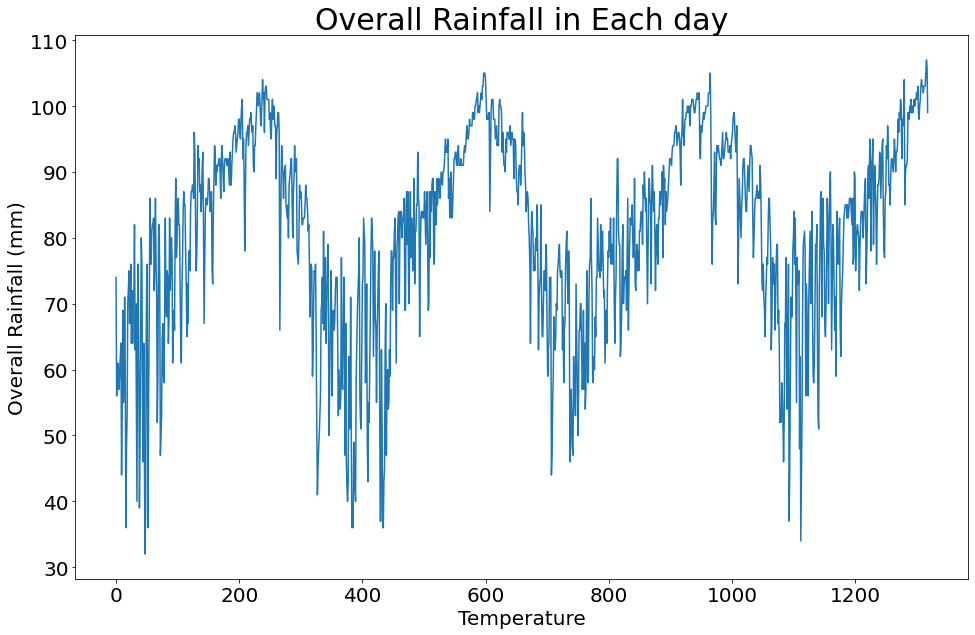

In [15]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = data.groupby('Unnamed: 0').sum()['TempHighF']
dfg.plot(kind ='line', title='Overall Rainfall in Each day', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
plt.xlabel('Temperature')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

print('Mean: ' + str(dfg.mean()))

Text(0.5, 1.0, 'SeaLevelPressureAvgInches vs PrecipitationSumInches')

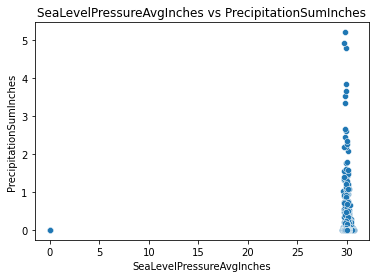

In [16]:
#scatter plot 2
ax = sns.scatterplot(x="SeaLevelPressureAvgInches", y="PrecipitationSumInches", data=data);
ax.set_title("SeaLevelPressureAvgInches vs PrecipitationSumInches")

In [17]:
# visualisation of this correlation
cormat = data.corr()
round(cormat,2)

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
Unnamed: 0,1.00,0.18,0.19,0.19,0.19,0.20,0.21,0.08,0.05,0.02,-0.01,0.04,0.08,0.05,-0.06,-0.05,-0.04,-0.01
TempHighF,0.18,1.00,0.97,0.88,0.74,0.76,0.73,0.12,-0.12,-0.26,-0.15,-0.03,0.23,0.19,0.01,-0.01,0.03,-0.07
TempAvgF,0.19,0.97,1.00,0.97,0.81,0.84,0.82,0.19,0.02,-0.10,-0.14,-0.04,0.15,0.10,0.01,0.03,0.03,-0.02
TempLowF,0.19,0.88,0.97,1.00,0.83,0.88,0.87,0.25,0.17,0.07,-0.12,-0.04,0.06,0.00,0.02,0.08,0.02,0.03
DewPointHighF,0.19,0.74,0.81,0.83,1.00,0.97,0.90,0.51,0.41,0.26,0.13,0.25,0.08,-0.13,0.12,0.07,0.13,0.14
DewPointAvgF,0.20,0.76,0.84,0.88,0.97,1.00,0.97,0.52,0.45,0.32,0.10,0.22,0.06,-0.13,0.05,0.04,0.06,0.13
DewPointLowF,0.21,0.73,0.82,0.87,0.90,0.97,1.00,0.48,0.46,0.36,0.08,0.18,0.06,-0.10,-0.01,0.00,-0.01,0.13
HumidityHighPercent,0.08,0.12,0.19,0.25,0.51,0.52,0.48,1.00,0.83,0.55,0.05,0.08,-0.30,-0.48,0.01,-0.09,0.00,0.22
HumidityAvgPercent,0.05,-0.12,0.02,0.17,0.41,0.45,0.46,0.83,1.00,0.92,0.07,0.06,-0.45,-0.60,0.02,-0.00,0.02,0.34
HumidityLowPercent,0.02,-0.26,-0.10,0.07,0.26,0.32,0.36,0.55,0.92,1.00,0.07,0.04,-0.46,-0.57,0.03,0.06,0.02,0.36


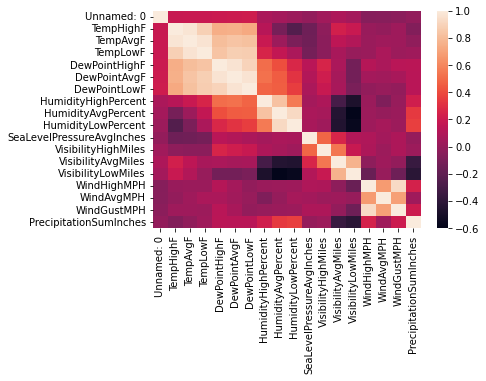

In [18]:
#Correlation matrix to heat map
sns.heatmap(cormat);

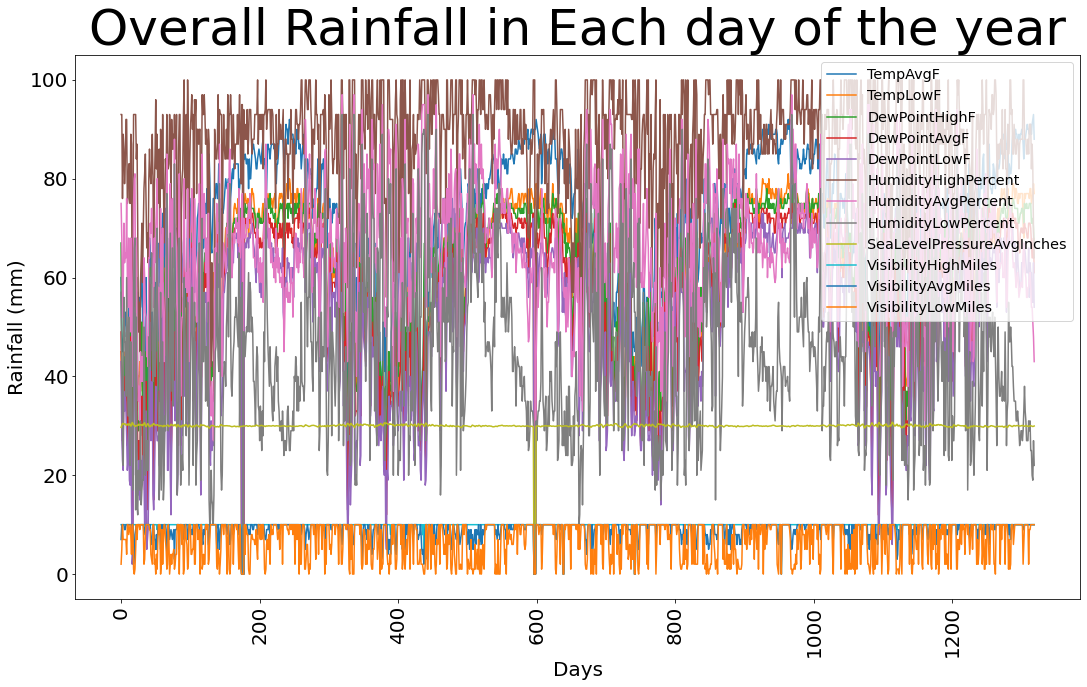

In [19]:
months = data.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
data.groupby('Unnamed: 0').mean()[months].plot.line(title='Overall Rainfall in Each day of the year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.xlabel('Days')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(50)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

# Predict rainfall

In [20]:
day_index = 798
days = [i for i in range(Y.size)]

In [21]:
clf = LinearRegression()
clf.fit(X, Y)

LinearRegression()

In [22]:
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = inp.reshape(1, -1)

In [23]:
# Print output
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[1.33868402]]


The precipitation trend graph: 


Text(0, 0.5, 'Precipitation in inches')

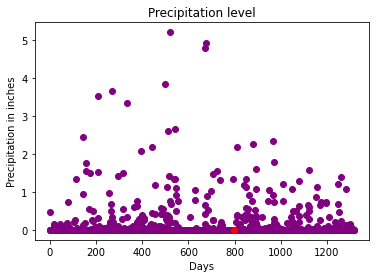

In [24]:
print('The precipitation trend graph: ')
plt.scatter(days, Y, color='purple')
plt.scatter(days[day_index], Y[day_index], color='red')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')


In [25]:
# Plot a graph of precipitation levels vs n# of days
plt.show()

In [26]:
x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis=1)
print('Preciptiation Vs Selected Attributes Graph: ')

Preciptiation Vs Selected Attributes Graph: 


Precipitation vs selected attributes graph:


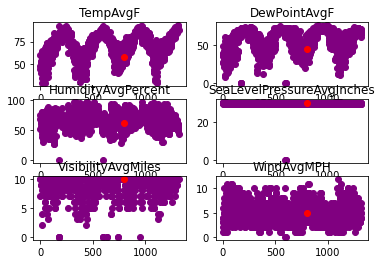

In [27]:
for i in range(x_f.columns.size):
    plt.subplot(3, 2, i+1)
    
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='purple')
    
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
                [day_index], color='r')
    
    plt.title(x_f.columns.values[i])

# plot a graph with a few features vs precipitation to observe the trends
print("Precipitation vs selected attributes graph:")
plt.show()


A day (in red) having precipitation of about 2 inches is tracked across multiple parameters (the same day is tracker across multiple features such as temperature, pressure, etc). The x-axis denotes the days and the y-axis denotes the magnitude of the feature such as temperature, pressure, etc. From the graph, it can be observed that rainfall can be expected to be high when the temperature is high and humidity is high.

# Testing the model's accuracy

# Linear regression

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [29]:
# In order to normalize the features, it is better to use MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
lm.score(X_test,Y_test)
linearregression = lm.score(X_test,Y_test)
print('test accuracy:', linearregression)

test accuracy: 0.3850388686467081
